## Initial imports

In [1]:
import av_utils as av
import numpy as np
import sympy as sp
import sympy.vector as sv
import plotly.graph_objects as go
from sympy.plotting.plot import plot3d, plot3d_parametric_line, plot3d_parametric_surface, plot_parametric
import matplotlib.pyplot as plt

E para ter equações bonitas usamos o seguinte comando

In [2]:
sp.init_printing()

## Geometria de Curvas Espaciais

Cada curva tem certas características geométricas chamadas invariantes. Esses invariantes
são relacionados com as propriedades físicas de curva. Alguns destes invariantes são:
* comprimento do arco
* o numero das singularidades,
* curvatura, que mede quanto a curva se dobra,
* torção, que mede quanto a curva se torce.

### Curvas paramétricas

Vamos conhecer as curvas paramétricas através de um exemplo. Um exemplo da curva é a
trajetoria de um móvel em 2D. Vamos estudar esse exemplo passo a passo. A trajetoria é representada


$$
\vec{r} (t) =\begin{cases}
x(t)=0.2t^2 + 5t + 0.5
\\y(t)=-t^2+10t+2
\end{cases}
$$

Para começar, temos que definir as nossas variaveis. Tem varias formas de fazer isso. O jeito mais pratico é 

In [3]:
x,y,z,t,s,u,v, phi, theta = sp.symbols('x y z t s u v phi theta',real=True)

Só para conferir:

In [4]:
x

Para definir uma curva parametrizada, primeiramente temos de definir um sistema de coordenadas. Para fazer isso usamos a classe *CoordSys3D* do modulo *sympy.vector*.

In [5]:
R = sv.CoordSys3D('R')

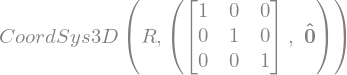

In [6]:
R

Agora **R** é o nosso sistema de coordenada Carteseana que tem tres eixos $\hat{i}, \hat{j}$ and $\hat{k}$. 

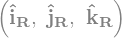

In [7]:
R.i, R.j,R.k

#### Um Exemplo: Trajetoria de um Projetil em 2D

Depois de estabelecer um sistema de coordenadas, conseguimos definir uma curva parametrizada. Essas curvas são funções vetoriais e tem a seguinte forma

$$\vec r(t) = x(t) \hat{i} + y(t) \hat{j} +z(t) \hat{k}.$$

Agora temos tudo que é necessario para definir a nossa curva. Adotamos a seguinte abordagem para implementar uma curva parametrizada

In [11]:
def trajectory(t): return (0.2*(t**2) + 5*t +0.5)*R.i \
    + (-t**2+10*t+2)*R.j 

In [12]:
trajectory(t)

(0.2*t**2 + 5*t + 0.5)*R.i + (-t**2 + 10*t + 2)*R.j

In [13]:
trajectory(2)

11.3000000000000*R.i + 18*R.j

Nos podemos acessar aos componentes da nossa função vetorial.  

In [23]:
trajectory(t).components

{R.i: 0.2*t**2 + 5*t + 0.5, R.j: -t**2 + 10*t + 2}

O resultado acima é um dicionario. Podemos pegar as funções de cada eixo (os valores da dicionario) usando

In [93]:
trajectory(t).components[R.i]

In [24]:
trajectory(t).components.values()

dict_values([0.2*t**2 + 5*t + 0.5, -t**2 + 10*t + 2])

In [29]:
trajectory(t).components.keys()

dict_keys([R.i, R.j])

In [43]:
k = trajectory(t).components.keys()
for item in k:
    display(item)

In [44]:
d = trajectory(t).components.values()
for item in d:
    display(item)

In [45]:
for key, value in trajectory(t).components.items():
    display(f"A chave é {key} e o valor da chave é {value}")

'A chave é R.i e o valor da chave é 0.2*t**2 + 5*t + 0.5'

'A chave é R.j e o valor da chave é -t**2 + 10*t + 2'

E para ser mais util, no nosso caso, é bom transformar o objeto acima em um *tuple* ou *list*

In [46]:
tuple(trajectory(t).components.values())

Agora vamos calcular o deslocamento da particlu entre $t=3$ e $t=6$

In [11]:
r3 = trajectory(3);
r6 = trajectory(6);
deslocamento = r6 - r3;
print(f"A posição da particula \n no instante t=3 é {r3} e \n no instante t=6 é {r6}.\
\n Só o deslocamento fica {deslocamento}")

A posição da particula 
 no instante t=3 é 17.3000000000000*R.i + 23*R.j e 
 no instante t=6 é 37.7000000000000*R.i + 26*R.j.
 Só o deslocamento fica 20.4000000000000*R.i + 3*R.j


Agora vamos fazer um plot dessa configuração. O Sympy tem funções internas para fazer plot. Essas funções são baseadas no Matplotlib, porem, são problematicas az vezes. Por isso é melhor usar o `Plotly` para plotar. Como foi mencionado anteriormente, as expressões do Sympy são analiticos, contrario do resto do Python puro e Matplotlib. Por isso para poder plotar as expressões do Sympy usando Matplotlib temos que ter uma ponte entre esses pacotes. A funções *Lambdify* do Sympy faz essa conexão para a gente!

In [36]:
trajectory_components = tuple(trajectory(t).components.values())
f = sp.lambdify(t,trajectory_components)

In [48]:
f

<function _lambdifygenerated(t)>

In [13]:
f(t)

In [47]:
f(x)

Como se sabe o nome da variavel é irrelevante!

In [14]:
f(x)

Esse objeto *f* é uma função que aceita valores numericos e retorna os Arrays do Numpy

In [53]:
points = f(np.arange(0, 5, 0.1))

In [57]:
type(points)

tuple

In [56]:
len(points)

In [51]:
points[0]

array([ 0.5  ,  1.002,  1.508,  2.018,  2.532,  3.05 ,  3.572,  4.098,
        4.628,  5.162,  5.7  ,  6.242,  6.788,  7.338,  7.892,  8.45 ,
        9.012,  9.578, 10.148, 10.722, 11.3  , 11.882, 12.468, 13.058,
       13.652, 14.25 , 14.852, 15.458, 16.068, 16.682, 17.3  , 17.922,
       18.548, 19.178, 19.812, 20.45 , 21.092, 21.738, 22.388, 23.042,
       23.7  , 24.362, 25.028, 25.698, 26.372, 27.05 , 27.732, 28.418,
       29.108, 29.802])

In [54]:
points[1]

array([ 2.  ,  2.99,  3.96,  4.91,  5.84,  6.75,  7.64,  8.51,  9.36,
       10.19, 11.  , 11.79, 12.56, 13.31, 14.04, 14.75, 15.44, 16.11,
       16.76, 17.39, 18.  , 18.59, 19.16, 19.71, 20.24, 20.75, 21.24,
       21.71, 22.16, 22.59, 23.  , 23.39, 23.76, 24.11, 24.44, 24.75,
       25.04, 25.31, 25.56, 25.79, 26.  , 26.19, 26.36, 26.51, 26.64,
       26.75, 26.84, 26.91, 26.96, 26.99])

Agora só plotar os pontos acima usando Plotly

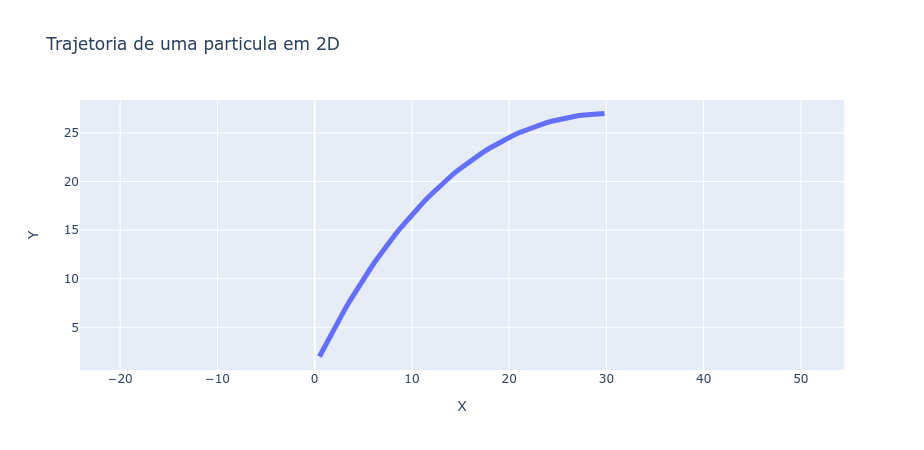

In [16]:
fig = go.Figure()
av.plot_curve(x = points[0],y = points[1], fig = fig, xtitle = "X", ytitle="Y", title = 'Trajetoria de uma particula em 2D')
fig.show()

Para saber a posição do vetor de posição da particula nos instantes $t=3$ e $t=6$ podemos plotar setas

In [59]:
f(3)

In [60]:
f(6)

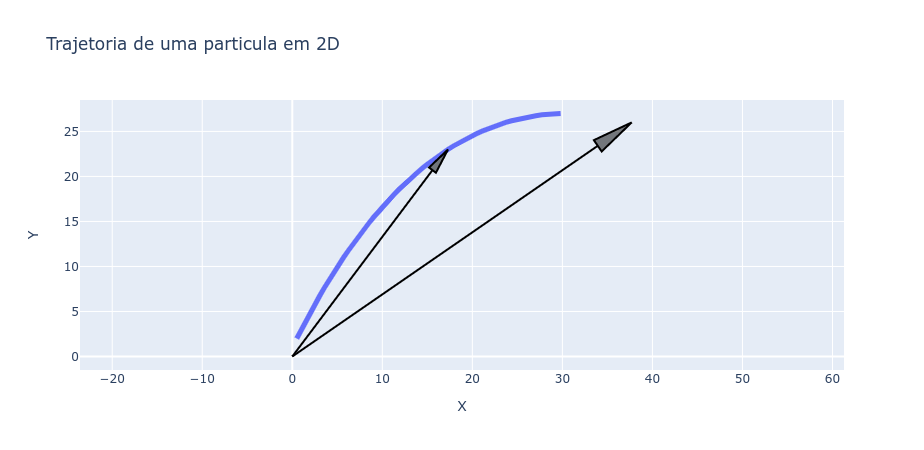

In [17]:
fig = go.Figure()
av.plot_curve(x = points[0],y = points[1], fig = fig, xtitle = "X", ytitle="Y", title = 'Trajetoria de uma particula em 2D')
av.position_vector(f(3)[0],f(3)[1], fig = fig)
av.position_vector(f(6)[0],f(6)[1], fig = fig)
fig.show()

Para ver mais pontos ao longo do eixo $x$ basta inserir um intervalo maior na função *f*

In [61]:
points1 = f(np.arange(0, 12, 0.1))

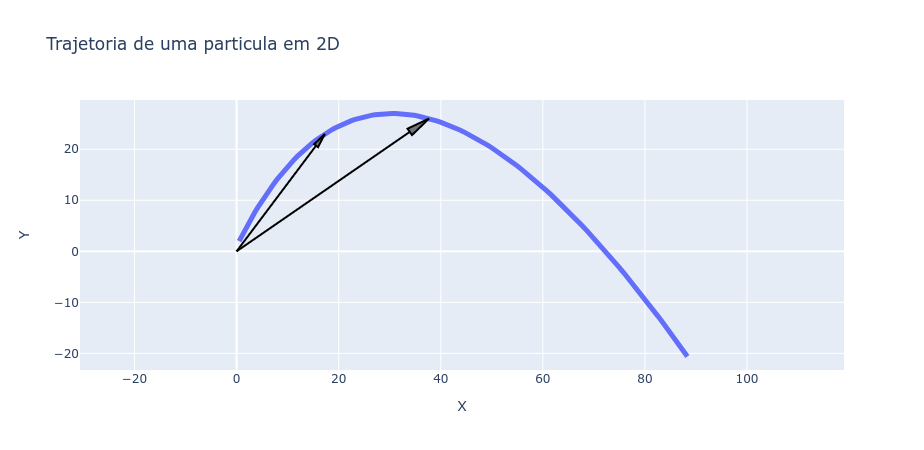

In [62]:
fig = go.Figure()
av.plot_curve(x = points1[0],y = points1[1], fig = fig, xtitle = "X", ytitle="Y", title = 'Trajetoria de uma particula em 2D')
av.position_vector(f(3)[0],f(3)[1], fig = fig)
av.position_vector(f(6)[0],f(6)[1], fig = fig)
fig.show()

Um detalhe que merece ser enfatizado. O projetil não começou o seu movimento do ponto $(0,0)$. Por isso para $t=0$ não temos $y=0$. Podemos interpretar que o projetil foi lançado em um palco acima do chão e fora do centro de sistema de coordenadas. 
Como já sabemos da fisica, em um movimento 2D com aceleração para cima, a particula sobe e depois começa a cair. Agora é interessante descobrir quando $(t=?)$ a particula vai chegar ao solo. Para fazer isso temos que resolver a equação $y(t)=0$

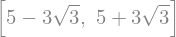

In [63]:
time = sp.solve(f(t)[1],t)
time

A primeira solução é negativa, então não é aceitavel.

In [64]:
sp.N(time[0])

Portanto a particula volta ao solo no tempo

In [69]:
display(f'A particula chega ao solo no instante t={sp.N(time[1])}')

'A particula chega ao solo no instante t=10.1961524227066'

Graficamente temos

In [70]:
x_final,y_final = f(sp.N(time[1]))[0].round(),f(sp.N(time[1]))[1].round()

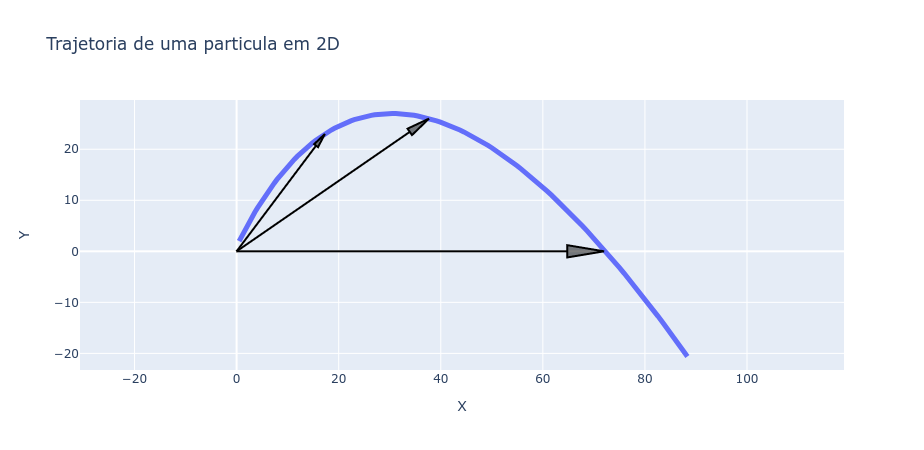

In [72]:
fig = go.Figure()
av.plot_curve(x = points1[0],y = points1[1], fig = fig, xtitle = "X", ytitle="Y", title = 'Trajetoria de uma particula em 2D')
av.position_vector(f(3)[0],f(3)[1], fig = fig)
av.position_vector(f(6)[0],f(6)[1], fig = fig)
av.position_vector(float(x_final),float(y_final), fig = fig)
fig.show()

Um detalhe que merece ser enfatizado. O móvel não começou o seu movimento do ponto $(0,0)$. Por isso para $t=0$ não temos $y=0$ (verifique!). Podemos interpretar que o móvel foi lançado em um palco acima do chão e fora do centro de sistema de coordenadas.

#### Circulo

Como outro exemplo, um circulo de raio um pode ser definido como

$$\vec r(t) = cos(t) \hat{i} + sin(t) \hat{j}$$ 

In [75]:
def circle(t): return sp.cos(t)*R.i + sp.sin(t)*R.j

In [76]:
circle(t)

#### Plot do circulo usando Sympy

Como já foi mencionaod o Sympy tem uma função interna para plotar as curvas parametricas. Essa função fica no modulo *Sympy.plotting.plot* que foi importada no inicio do notebook. Essa função não reconhece o formato vetorial das nossas curvas e temos que extrair os componentes da curva e passar como tuple para ela. 

In [77]:
circle_components = tuple(circle(t).components.values())

In [78]:
circle_components

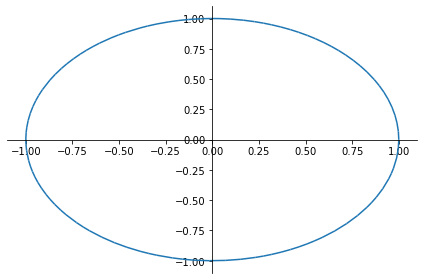

In [79]:
sp.plot_parametric(*circle_components,(t,0,2*sp.pi))

Para automatizar o processo acima podemos definir a seguinte função. Lembrando que o modulo * plot_parametric * esteja importado. 

In [82]:
import sympy as sp
from sympy.plotting.plot import plot_parametric
def Plot_Parametric_Curve(curve, a):
    
    
    '''
    curve: must be in the notaion of sympy.vector
    a (tuple): (parameter, start, finish) 
    '''
    curve_components = tuple(curve.components.values())
    
    
    plot = sp.plot_parametric(*curve_components, a)
    
    plt.show()
    
    pass 

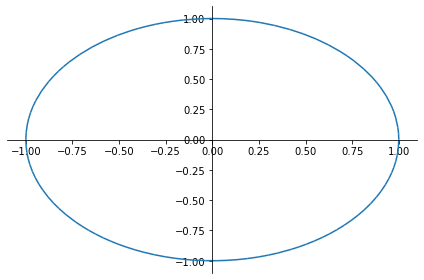

In [83]:
Plot_Parametric_Curve(circle(t),(t,0,2*sp.pi))

#### Plot do circulo usando Plotly

Para plotar o circulo vamos seguir os mesmos passos anteriores

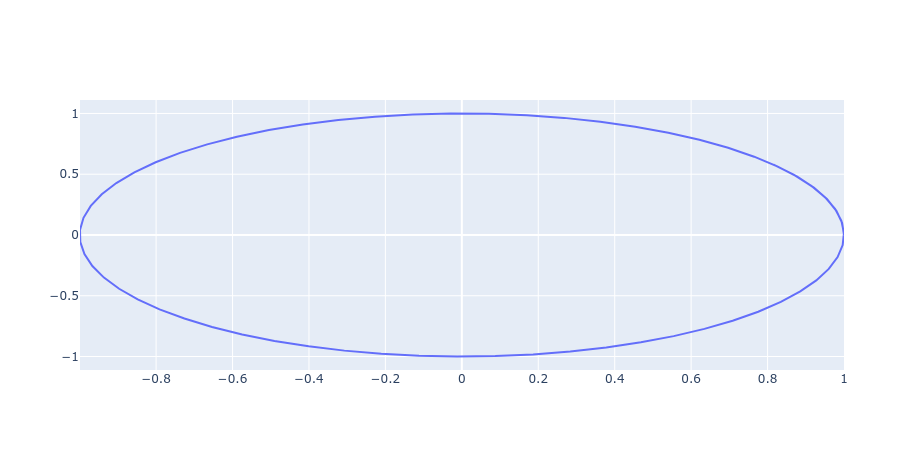

In [86]:
circle_components = tuple(circle(t).components.values())
cir = sp.lambdify(t,circle_components)
points = cir(np.arange(0, 7, 0.1))

fig = go.Figure()
fig.add_scatter(x = points[0], y = points[1])


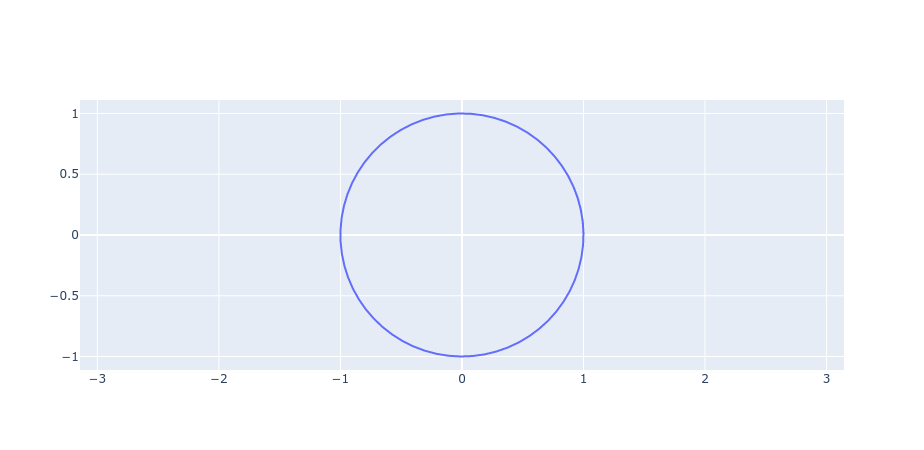

In [91]:
circle_components = tuple(circle(t).components.values())
cir = sp.lambdify(t,circle_components)
points = cir(np.arange(0, 7, 0.1))

fig = go.Figure()
fig.add_scatter(x = points[0], y = points[1])

fig.update_layout(yaxis=dict(scaleanchor="x"))
fig.show()

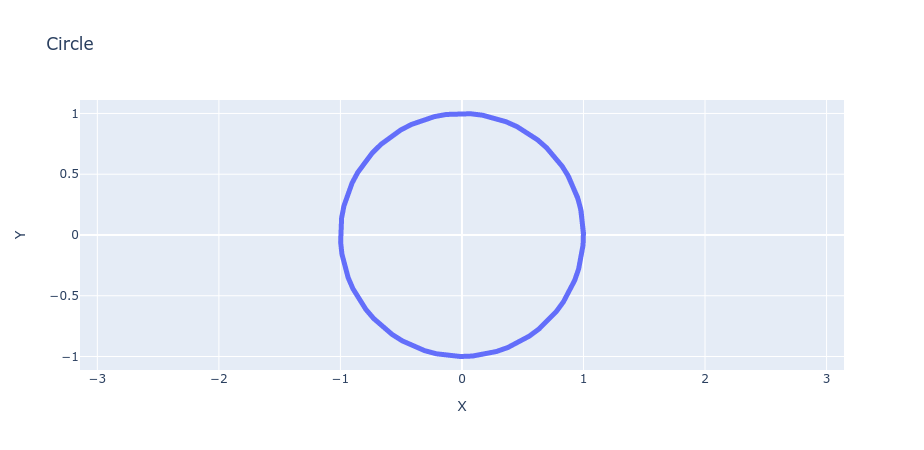

In [25]:
cir = sp.lambdify(t,circle_components)
points = cir(np.arange(0, 7, 0.1))

av.plot_curve(points[0],points[1], title = "Circle")


#### Helice

Em 3D, para a helice $\vec r(t) = cos(t) \hat{i} + sin(t) \hat{j} + t \hat{k}$ é definida

In [95]:
def helix(t): return sp.cos(t)*R.i + sp.sin(t)*R.j + t*R.k

In [96]:
helix(t)

De novo, podemos acessar aos components de cada eixo usando *components* attribute.

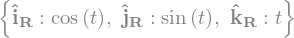

In [97]:
helix(t).components

A projeção da helice ao longo do eixo $x$ é 

In [98]:
helix(t).components[R.i]

#### Plot da helice usando Sympy

Agora vamos traçar essa curva (helice). Verifique se o módulo *plot3d_parametric_line* seja importado. Com o formato que definimos nossa curva, não podemos a inserir diretamente na função definida para o módulo de plotagem. Dê uma olhada na ajuda de *plot3d_parametric_line*. Mas não fique nervoso! Nós podemos resolver isso. Primeiro, precisamos extrair os componentes e depois passá-los para o módulo de plotagem.

In [99]:
curve_components = tuple(helix(t).components.values())

Agora podemos passar o tuple acima para o módulo *plot3d_parametric_line*. Observe a descompactação do tuple usando `* ´

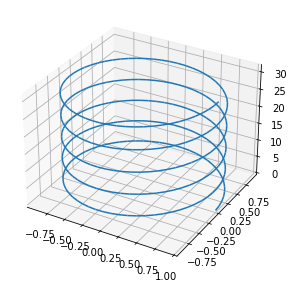

In [101]:
from sympy.plotting.plot import plot3d_parametric_line
plot3d_parametric_line(*curve_components, (t,0,10*sp.pi))
plt.show()

Podemos facilitar a tarefa definindo uma função simples que automatiza o procedimento acima. A função abaixo recebe uma curva parametrizada, semelhante à nossa notação, e o nome do parametro da curva e o intervalo do gráfico

In [103]:
from sympy.plotting.plot import plot3d_parametric_line

def Plot3d_Parametric_Curve(curve, a):
    '''
    curve: must be in the notaion of sympy.vector
    a (tuple): (parameter, start, finish) 
    '''
    
    curve_components = tuple(curve.components.values())
    
    plot3d_parametric_line(*curve_components, a)
    
    plt.show()
    
    pass 

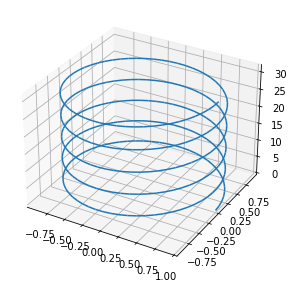

In [104]:
Plot3d_Parametric_Curve(helix(t),(t,0,10*sp.pi))

#### Plot da helice usando Plotly

Para plotar usando Matplotlib seguimos uma aborgadem semelhante a anterior. Com essa diferença que agora a plotagem será em 3D e por isso tem alguns comandos diferentes 

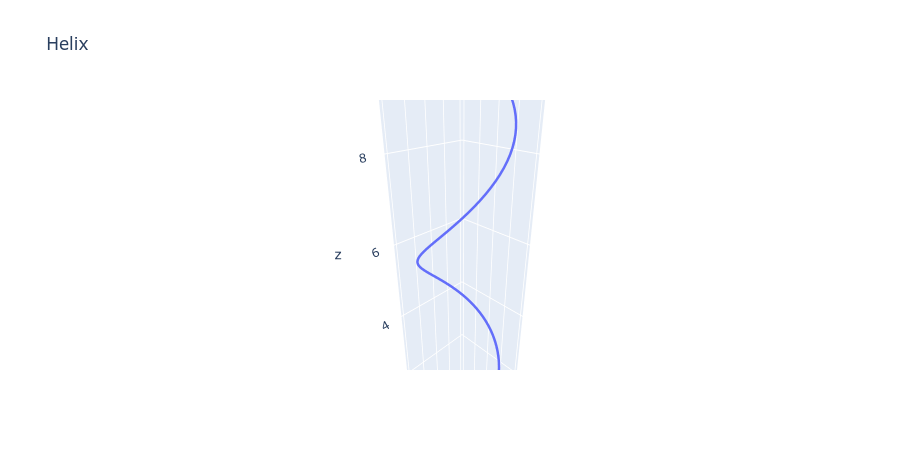

In [105]:
helix_components = tuple(helix(t).components.values())
helice = sp.lambdify(t,helix_components)

points = helice(np.arange(0, 4*np.pi, 0.1))

av.plot_curve3d(points[0],points[1],points[2], title="Helix")


<span style="color:red"> **EXERCICIO** Uma curva parametrizada em 2D é o cicloide, $$(t - \sin(t))\hat{i} +(1-\cos(t))\hat j .$$ Plote essa curva</span>

<span style="color:red"> **EXERCICIO** Uma curva parametrizada conhecida em 3D é o astroide, $$\cos(t)^3\hat{i} +\sin(t)^3\hat j + cos(2t) \hat k .$$ Plote essa curva</span>

### Segmento de reta

Na disciplina Geometria Analítica, a gente aprendeu como construir as equações paramétricas de um segmento de reta que conecta dois pontos $P(x_1,y_1,z_1)$ e $Q(x_2,y_2,z_2)$. Para fazer isso temos que achar o vetor diretor. Depois usando esse vetor diretor e um dos pontos podemos construir as equações parametricas na seguinte forma
$$
\begin{cases}
x(t) = a t +x_1
\\ y(t) = b t + y_1 \qquad 0\leqslant t \leqslant 1
\\ z(t) = c t +z_1
\end{cases}
$$
onde $a, b$ e $c$ são componentes do vetor diretor da reta dado por
$$
\vec{v} = <a,b,c> = <x_2-x_1,y_2-y_1,z_2-z_1,>
$$

### Vetor de Posição

Como já sabemos, uma curva é feita de infinitos pontos. Ao substituir um valor pelo parâmetro da curva, podemos encontrar o ponto associado a esse parâmetro. Por exemplo

In [107]:
helix(sp.pi)

In [108]:
circle(sp.pi)

Uma curva parametrizada, como foi descutido anteriormente, pode ser imaginada como uma trajetória de uma partícula. Essa partícula possui uma posição vetorial que conecta sua posição no espaço à origem de um sistema de coordenadas. Se o parâmetro da curva for o tempo, variando o parâmetro, obtemos diferentes posições da partícula durante seu movimento.

<span style="color:red"> **EXERCICIO:** Usando Plotly, defina uma função chamada de Plot_Position_Vector de tal forma que como entrada pega tres objetos: uma curva 2D, um tuple que consista de (parametro, ponto inicial,ponto final) e o numero de vetores de posição da curva. O resultado para um circulo deve ser igual a figura abaixo. </span>

In [83]:
Plot_Position_Vector(circle(t),(t,0,2*pi), 35)

NameError: name 'Plot_Position_Vector' is not defined

<span style="color:red"> **EXERCICIO**: Usando Plotly, defina uma função chamada de Plot3d_Position_Vector de tal forma que como entrada pega tres objetos: uma curva 3D, um tuple que consista de (parametro, ponto inicial, ponto final) e o numero de vetores de posição da curva. O resultado para uma helice deve ser igual ao resultado da função abaixo. Notem que ainda o Plotly não tem um modulo para plotar uma seta em 3D. </span>

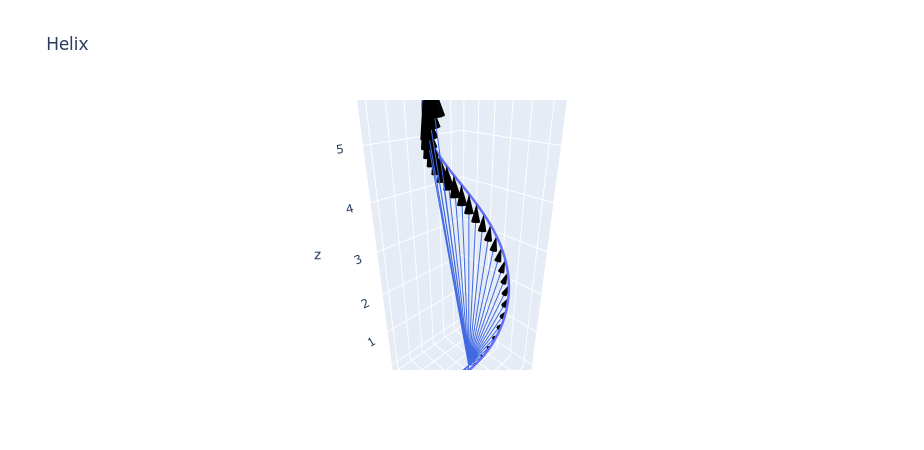

In [111]:
helix_components = tuple(helix(t).components.values())
helice = sp.lambdify(t,helix_components)

points = helice(np.arange(0, 2*np.pi, 0.1));

fig = go.Figure()
av.plot_curve3d(points[0],points[1],points[2], title="Helix" , fig = fig)
for i in range(len(points[0])):
    if i%2 == 0:
        continue
    av.position_vector3d(points[0][i],points[1][i],points[2][i], fig = fig)
fig.show()

### Velocidade e Aceleração

Se consideramos uma curva como a trajetoria de uma partícula, podemos chamar $\vec r (t)$ como o vetor de posição. Então a derivada deste vetor será o vetor de velocidade, $\vec v (t) = \vec{r^\prime}(t)$ e a segunda derivada será a aceleração, $\vec a (t) = \vec{v^\prime}(t)=\vec{t^{\prime\prime}}(t)$. A rapidez é definido como o modulo (magnitude) do vetor de velocidade, $v (t) = |\vec v (t)|$. <br/>
Para calcular a velocidade de uma partícula que está se movimentando ao longo da hélice acima vamos fazer o seguinte procedimento

### Operações Basicas


#### Produto Escalar

O produto escalar entre os vetores de base $\hat i$ e $\hat j$ é

In [115]:
(R.i).dot(R.j)

In [116]:
R.j.dot(R.j)

Aqui temos uma pergunta: como é o produto escalar entre duas  funções vetoriais? O Sympy já tem uma função interna para isso

In [113]:
v1 = 2*R.i + 3*R.j + 5*R.k
v2 = R.i - 2*R.j + 2*R.k

In [114]:
v1.dot(v2)

E para uma função vetorial geral temos

In [17]:
x1 = sp.Function('x1');x2 = sp.Function('x2');y1 = sp.Function('y1');
y2 = sp.Function('y2');z1 = sp.Function('z1');z2 = sp.Function('z2')

def curve1(t): return x1(t)*R.i + y1(t)*R.j + z1(t)*R.k 
def curve2(t): return x2(t)*R.i + y2(t)*R.j + z2(t)*R.k 

In [18]:
curve1(t).dot(curve2(t))

#### Produto Vetorial

Afunção que faz o produto vetorial entre dois vetores tambem é predefinida

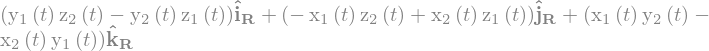

In [66]:
curve1(t).cross(curve2(t))

Só para testar vamos conferir alguns resultados conhecidos

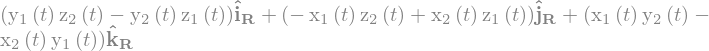

In [67]:
curve1(t) ^ curve2(t)

In [68]:
R.i ^ R.j

In [69]:
R.i ^ R.i

#### Modulo 

Para encontrar a norma (módulo, magnitude) de um vetor definimos a seguinte função

In [22]:
def Norm(v):
    return sp.simplify(sp.sqrt(v.dot(v)))

Checando a função

In [23]:
Norm(curve1(t))

De fato, existe uma função interna no Sympy que calcula a norma de um vetor

In [24]:
curve1(t).magnitude()

#### Vetor Unitario

Para transformar um vetor em um vetor unitario (de modulo um)

In [25]:
def Unit_Vector(curve):
    return curve/Norm(curve)

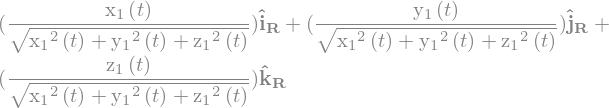

In [26]:
Unit_Vector(curve1(t))

Usando a função interna de *normalize* obtemos o mesmo resultado.

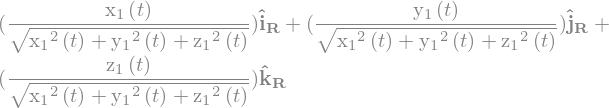

In [75]:
curve1(t).normalize()

#### Diferenciação

Para a derivada de uma função vetorial temos a seguinte função

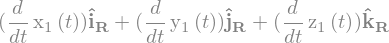

In [76]:
curve1(t).diff(t)

In [77]:
helix(t).diff(t)

Se a função vetorial possui apenas uma variável (apenas curvas), não há necessidade de inseri-la explicitamente em *diff()*

In [78]:
helix(t).diff()

### Velocidade e Aceleração

Se consideramos uma curva como a trajetoria de uma partícula, podemos chamar $\vec r (t)$ como o vetor de posição. Então a derivada deste vetor será o vetor de velocidade, $\vec v (t) = \vec{r^\prime}(t)$ e a segunda derivada será a aceleração, $\vec a (t) = \vec{v^\prime}(t)=\vec{t^{\prime\prime}}(t)$. A rapidez é definido como o modulo (magnitude) do vetor de velocidade, $v (t) = |\vec v (t)|$. <br/>
Para calcular a velocidade de uma partícula que está se movimentando ao longo da hélice acima vamos fazer o seguinte procedimento

#### Comprimento de Arco

Os detalhes nos slides

Para encontrar o comprimento de uma curva entre dois pontos, $t \in [a,b]$ definimos a seguinte função

In [27]:
def Arc_Length(curve, a): 
    #a: Um Tuple (variavel, inicio, fim)
    return sp.integrate(Norm(curve.diff()),a)

In [29]:
Arc_Length(helix(t),(t,0,sp.pi))

Calculando o valor numérico da expressão acima

In [37]:
sp.N(Arc_Length(helix(t),(t,0,sp.pi)))

Calculando a circumferencia de um circulo com raio 3.

In [34]:
Arc_Length(3*circle(t),(t,0,2*sp.pi))

<span style="color:red"> **Exercício:** Use a função interna *magnitude()* para calcular o comprimento de uma curva </span>

### Velocidade e Aceleração

Se consideramos uma curva como a trajetoria de uma partícula, podemos chamar $\vec r (t)$ como o vetor de posição. Então a derivada deste vetor será o vetor de velocidade, $\vec v (t) = \vec{r^\prime}(t)$ e a segunda derivada será a aceleração, $\vec a (t) = \vec{v^\prime}(t)=\vec{t^{\prime\prime}}(t)$. A rapidez é definido como o modulo (magnitude) do vetor de velocidade, $v (t) = |\vec v (t)|$. <br/>
Para calcular a velocidade de uma partícula que está se movimentando ao longo da hélice acima vamos fazer o seguinte procedimento

In [38]:
# Só para relembrar
helix(t)

In [39]:
velocity_helix = helix(t).diff();
velocity_helix

In [85]:
acceleration_helix = velocity_helix.diff();
acceleration_helix

Prestam atenção que os objetos *acceleration_helix* e *velocity_helix* não são funções e por isso não tem como os utilizar para achar a velocidade e aceleração da particula em um instante de tempo especifico. 

In [40]:
acceleration_helix(1)

NameError: name 'acceleration_helix' is not defined

<span style="color:red">**EXERCICIO** Resolva o problema acima definindo uma função para velocidade e aceleração. </span>

### O caminho contrario!

Outra situação que possa aparecer é ter a equação parametrica da aceleração e queremos calcular as equações de velocidade e posição, ou seja, ir pelo caminho contrario que fizemos acima. Neste caso, de fato, queremos resolver uma equação diferencial ordinaria (EDO) e precisamos de valroes iniciais para calcular a velocidade e posição. Esses valores iniciais vão ajudar a gente para determinar as constantes de integração. Vale resaltar que, como estamos integrando de um vetor, a constante de integração tambem é um vetor. 

$$
\int \vec a(t) dt = \vec v(t) + \vec v_0\\
\int \vec v(t) dt = \vec r(t) + \vec r_0
$$

**Exemplo:** 
Uma particula movendo-se começa numa posição inicial $\vec r(0)=<1,0,0>$ com uma velocidade inicial $\vec v(0) = \hat i - \hat j + \hat k$. Sua aceleração é $\vec a(t) = 4t\hat i + 6t\hat j + \hat k$. Determine a sua velocidade e posição no momento t.

**Resolução**

A implementação desta solução não é bem direta no Sympy, por causa das constantes de integração. Mas vamos fazer isso com calma!

O primeiro passo é relembrar que uma função vetorial é composta de três funções e a integração atua em cima de cada uma separadamente. Ou seja, a integração de ``x(t)`` não afeta ``y(t)``. Isso nos permita que separamos a integral $\int \vec a(t)$ em tres integrações separadas. A constante de integração tambem é um vetor e se separa três partes, por exemplo:

$$
\int \vec v(t) dt = \vec r(t) + \vec C \rightarrow \hat i (\int v_x(t) dt) + \hat j (\int v_y(t) dt) + \hat k (\int v_z(t) dt) = \hat i (x(t) + C_x) + \hat j (y(t) + C_y) + \hat k(z(t) + C_z) 
$$

Como foi dito anteriormente, esse processo é resolver um EDO. $\vec a = \vec r^{\prime\prime}$. A gente tem $\vec a$ e queremos calcular $\vec r$. Para resolver um EDO podemos usar o modulo ``dsolve`` do Sympy e definimos tres funções ``X(t), Y(t)`` e ``Z(t)`` para serem descobertos posteriormente. 

In [33]:
X = sp.Function('X')
Y = sp.Function('Y')
Z = sp.Function('Z')

Aí, as equações diferenciais que tem que serem resolvidos são 

In [43]:
eq_x = sp.Eq(X(t).diff(t,2), 4*t)
eq_y = sp.Eq(Y(t).diff(t,2), 6*t)
eq_z = sp.Eq(Z(t).diff(t,2), 1)

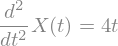

In [44]:
eq_x

Os valores iniciais tem que ser definidos como um dicionario. 

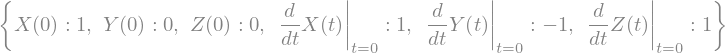

In [71]:
ics_x = {X(t).subs(t,0):1, X(t).diff(t).subs(t,0):1 }
ics_y = {Y(t).subs(t,0):0, Y(t).diff(t).subs(t,0):-1}
ics_z = {Z(t).subs(t,0):0, Z(t).diff(t).subs(t,0):1}

ics_total =  {**ics_x, **ics_y, **ics_z}

ics_total

Agora só inserir os ingredientes no forno!

In [72]:
res = sp.dsolve(eq=[eq_x, eq_y, eq_z], func = [X(t), Y(t), Z(t)], ics = ics_total)

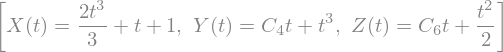

In [73]:
res

Não é claro para mim porque ainda na resolução acima tem constantes de integração! Então, vamos resolver as equações separadamente.

In [77]:
res_x = sp.dsolve(eq_x, X(t), ics=ics_x)
res_y = sp.dsolve(eq_y, Y(t), ics=ics_y)
res_z = sp.dsolve(eq_z, Z(t), ics=ics_z)

In [81]:
res_y

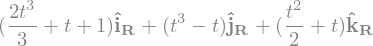

In [82]:
vetor_posição = res_x.rhs*R.i + res_y.rhs*R.j + res_z.rhs*R.k

vetor_posição

### Reparametrização

Como já foi mencionado, a parametrização de uma curva não é única, ou seja, uma curva pode ser representada por parametrizações diferentes. Mas para as curvas que não se interceptam sempre há um jeito para transformar uma parametrização a outra. Esse procedimento se chama reparametrização.  Este é possível através do uso da regra da cadeia. </br>
Suponha que uma curva não-interceptante tem as duas seguintes parametrizações 
$$
F(t), t \in [a,b] \qquad e \qquad G(u), u \in[c,d].
$$
Então existe uma função  $u=\varphi(t)$ tal que $\varphi(a)=c$ e $\varphi(b)=d$. Então temos $G(u)=G(\varphi(t))=F(t)$. Essa relação define a reparametrização da curva original. Se a parametrização for suave, logo $\varphi$ é diferenciável e $\varphi^\prime$ é continua. Então temos
$$
F^\prime (t) = G^\prime (\varphi(t)) \varphi^\prime (t)
$$

## Invariantes Geometricas

Qunado introduzimos o conceitos de curva parametrizada, digamos que o parametro da curva, a principio, não tem nenhum significado fisico. Porem,  se a curva for a trajetoria de um objeto o parametro *t* pode ser interpretada como *tempo*. Nessa forma, variando o parametro podemos calcular onde está a posição do objeto no espaço. Por exemplo, inserindo $t=3$ na equação da curva vamos ter 
$$
\vec r (3) = x(3) \hat i + y(3) \hat j + z(3) \hat k.
$$
Ou seja, o objeto está no ponto $(x(3),y(3),z(3))$.
Mas, as vezes, nos precisamos da posição do objeto tendo informação sobre a distancia percorrida a partir do ponto inicial. Por exemplo, a gente quer saber a posição de uma particula que está se deslocando ao longo de uma helice apos percorrer s = 5 metros. Para calcular isso, temos que reparametrizar a curva e usar *deslocamento* como parametro em vez de *tempo*. A gente chama isso de **Parametrização da curva em relação ao comprimento de arco**.


Agora a gente está pronto para calcular algumas quantidades invariantes de curvas. Vamos começar por o comprimento de arco. 

### Comprimento de Arco

Nós definimos o comprimento de arco como a integral da rapidez. Mais precisamente, o comprimento na curva $\vec r (t)$ entre $t = a$ e $t = b$ é
$$
L = \int_a^b v(t) dt = \int_a^b |\vec v (t)| dt.
$$
Como a velocidade é não-negativa, a função comprimento de arco
$$
s(t) = \int_a^t v(u) du
$$
é sempre crescente. Usando o teorema fundamental de calculo podemos calcular a derivada desta função por
$$
\frac{ds}{dt} = v(t) = |\vec v (t)| = |\vec{r^\prime}(t)|.
$$
Agora vamos verificar que o comprimento de arco é independente da parametrização
$$
\int_c^d|G^\prime (u)|du = \int_a^b |G^\prime (\varphi(t))|\varphi^\prime (t) dt = \int_a^b |F^\prime (t)|dt.
$$
No caso de uma curva espacial temos
$$
\vec r (t) = \left< x(t),y(t),z(t)\right>, \quad t \in R.
$$
Neste caso, para calcular o comprimento de arco temos
$$
L = \int ds = \int_a^b \frac{ds}{dt} = \int_a^b |\vec{r^\prime}(t)|dt = \int_a^b \sqrt{(x^\prime)^2+(y^\prime)^2+(z^\prime)^2}
$$

Para encontrar o comprimento de uma curva entre dois pontos, $t \in [a,b]$ relembramos a seguinte função

In [41]:
def Arc_Length(curve, a): 
    #a: Um Tuple (variavel, inicio, fim)
    return sp.integrate(Norm(curve.diff()),a)

In [42]:
Arc_Length(helix(t),(t,0,sp.pi))

Calculando o valor numérico da expressão acima

In [43]:
sp.N(Arc_Length(helix(t),(t,0,sp.pi)))

Calculando a circumferencia de um circulo com raio 3.

In [44]:
Arc_Length(3*circle(t),(t,0,2*sp.pi))

<span style="color:red"> **Exercício:** Use a função interna *magnitude()* para calcular o comprimento de uma curva </span>

### Parametrização em Relação ao Comprimento de Arco

Qunado introduzimos o conceitos de curva parametrizada, digamos que o parametro da curva, a principio, não tem nenhum significado fisico. Porem,  se a curva for a trajetoria de um objeto o parametro *t* pode ser interpretada como *tempo*. Nessa forma, variando o parametro podemos calcular onde está a posição do objeto no espaço. Por exemplo, inserindo $t=3$ na equação da curva vamos ter 
$$
\vec r (3) = x(3) \hat i + y(3) \hat j + z(3) \hat k.
$$
Ou seja, o objeto está no ponto $(x(3),y(3),z(3))$.
Mas, as vezes, nos precisamos da posição do objeto tendo informação sobre a distancia percorrida a partir do ponto inicial. Por exemplo, a gente quer saber a posição de uma particula que está se deslocando ao longo de uma helice apos percorrer s = 5 metros. Para calcular isso, temos que reparametrizar a curva e usar *deslocamento* como parametro em vez de *tempo*. A gente chama isso de **Parametrização da curva em relação ao comprimento de arco**. O caminho é o seguinte, primerio calcularmos a função de comprimento de arco
$$
s(t) = \int_a^t \|\vec r^\prime(u)\| du.
$$
Assim temos uma relação entre $s$ e $t$, ou seja $s = s(t)$. Aí, basta inverter essa relação e escrever $t=s^{-1}(s)$. No final, substituimos esse $t$ na equação da curva.

Agora podemos verificar que o comprimento da helice é independente da parametrização

Exemplo: Reparametrizar a helice em relação ao comprimento de arco, começando do ponto $t=0$

In [45]:
rapidez = Norm(helix(t).diff());
rapidez

In [46]:
def s(t): return integrate(rapidez,(u,0,t));

In [48]:
S, s = sp.symbols('S s')

In [50]:
S = sp.Eq(s, sp.integrate(rapidez,(u,0,t)))

In [51]:
S

In [52]:
t = sp.solve(S,t)

Vamos dar uma olhada na solução

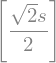

In [53]:
t

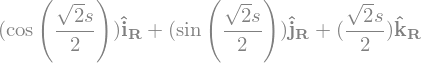

In [54]:
helix(t[0])

In [55]:
helix(s)

Preste atencão que a variavel $t$ não é mais independente! Para reutilizar dessa variavel tem que a recriar de novo.

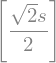

In [56]:
t

Como alteramos a definição da variavel ``t``, para futuris usos, redefinimos ela novamente.

In [58]:
t = sp.symbols('t')

In [59]:
t

### Triedro de Frenet

É um conjunto abstrato de três vetores 
$$(\vec T, \vec N , \vec B)$$
que diz respeito a propriedades cinemáticas de uma partícula que se move em uma trajetória curvilínea, usado em cálculo vetorial. No triedro, o vetor $\vec T$ representa a tangente à curva, o vetor $\vec N$ é a derivada do vetor $\vec T$, e o vetor $\vec B$ é o produto vetorial de $\vec T$ e $\vec N$

Tendo a equação parametrica de curva $$\vec r (t) = x(t) \hat i +y(t) \hat j+z(t) \hat k,$$ o **vetor tangente unitario** é definido como 
$$
\vec T(t) = \frac{\frac{d \vec r (t)}{dt}}{|\vec r (t)|} = \frac{\vec{r^\prime}(t)}{|\vec r (t)|}.
$$
e o **vetor normal unitário** é 
$$
\vec N(t) = \frac{\frac{d \vec T (t)}{dt}}{|\vec T (t)|} = \frac{\vec{T^\prime}(t)}{|\vec T (t)|}.
$$
Finalmente o **vetor binormal** é definido como o produto vetorial dos vetores $\vec T$ e $\vec N$,
$$
\vec B (t) = \vec T (t) \times \vec N (t)
$$

### Curvatura e Torção

A curvatura mede, em qualquer ponto, o quanto a curva está se dobrando quanto estamos andando ao longo da curva. Dito de outra forma, mede a falha da curva em ser linear. </br>
Podemos considerar a curvatura como a taxa de variação do vetor tangente em relação ao comprimento de arco. No caso de reta, como o vetor tangente é constante, a curvatura é zero. TEm três formulas equivalentes para calcular a curvatura. 
$$
\kappa (t) = \left| \frac{d \vec T (t)}{ds}\right| = \frac{\left| \vec{T^\prime}(t)\right|}{\left| \vec{r^\prime}(t)\right|} = \frac{\left|\vec{r^\prime}\times \vec{r^{\prime\prime}}\right|}{\left| \vec{r^\prime}\right|^3}
$$

A torção mede o quanto a curva está torcendo ou a falha da curva é planar. Ou seja, a taxa de rotação do vetor binormal. A torção é determinada unicamente pela equação
$$
\vec {B^\prime}(t) = \tau(t) \left| \vec{r^\prime}\right| \vec N(t).
$$
Prestam atenção que essa equação é composta de três equações. Por exemplo, para o componente $x$ temos
$$
B^\prime_x(t) = \tau(t) \left| \vec{r^\prime}\right|  N_x(t).
$$
Para achar a torção basta resolver uma dessas três equações.  Tem outra formula para calcular a torção [Wikipedia]
$$
\tau (t)=\frac{(\vec{r^\prime}\times \vec{r^{\prime\prime}})\cdot \vec{r^{\prime\prime\prime}} }{\left| \vec{r^\prime} \times \vec{r^{\prime\prime}}\right|}.
$$

<span style="color:red"> **EXERCICIO**: Monte uma função para calcular curvatura e torção, pegando a equação da curva como entrada. </span>

### Exemplos

Nessa subseção vamos analisar algumas caracteristicas geometricas de algumas curvas reconhecidas.

#### Astroide

Astroide é uma curva bidimensional definida por
$$
\vec r (t) = a\cos^3(t) \hat i + a \sin^3(t)\hat j
$$
Então uma astroide de raio 2 é implementada na seguinte forma

In [60]:
def astroid(t, a=2): return a*(sp.cos(t))**3*R.i + a*(sp.sin(t))**3*R.j

In [62]:
astroid(sp.pi)

Agora vamos plotar essa curva. Para facilitar a vida vamos montar uma função que que pega uma curva e um intervalo como entrada e gera a plotagem usando *Plotly*

In [63]:
def Plot_Parametric_Curve_plotly(curve,interval,precision=0.1):
    curve_components = tuple(curve.components.values())
    curve_np = sp.lambdify(t,curve_components)
    points = curve_np(np.arange(interval[0], interval[1], precision));
    
    av.curve(points[0],points[1], title = f'{curve}')

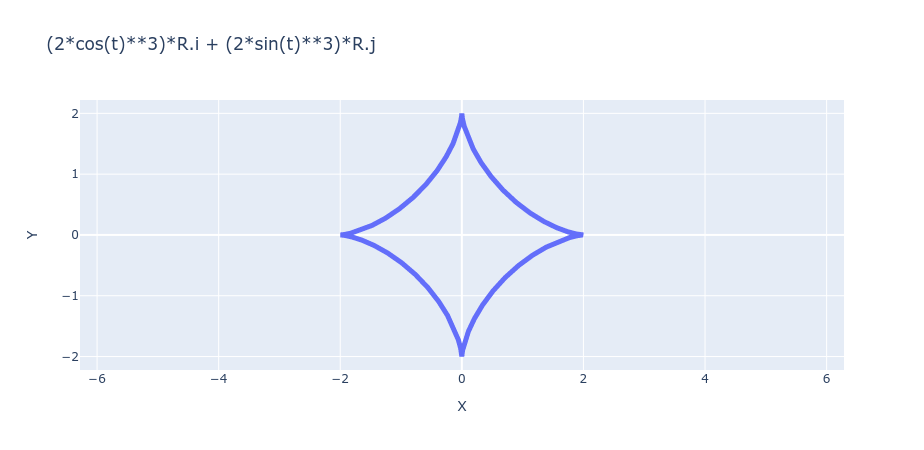

In [65]:
Plot_Parametric_Curve_plotly(astroid(t),(0,2*np.pi))

Bom, se essa curva foi trajetoria de um objeto qual seria a sua velocidade e aceleração? 

In [66]:
velocity_astroid = astroid(t).diff(t);
velocity_astroid

In [67]:
aceleration_astroid = velocity_astroid.diff();
aceleration_astroid.trigsimp()

Para calcular a velocidade e a aceleração da particula em um instante espicifico de tempo podemos usar do *subs*. Por exemplo, vamos ver qual é a velocidade e a aceleração to tempo $t = \frac{\pi}{4}$

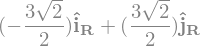

In [68]:
velocity_astroid.subs(t,sp.pi/4)

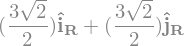

In [69]:
aceleration_astroid.subs(t,sp.pi/4)

Qual é a rapidez desse objeto?

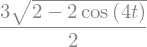

In [71]:
Norm(velocity_astroid).trigsimp()

<span style="color:red"> **EXERCICIO** onde a velocidade do objeto fica zero? Faça um grafico da função de rapidez para ter uma ideia. </span>

O proximo passo será calcular o triedro de Frenet para essa curva. Vamos definir algumas funções para fazer isso

In [72]:
def UT(curve): return curve.diff()/Norm(curve.diff())

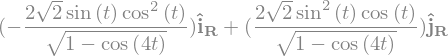

In [73]:
UT(astroid(t)).simplify()

In [75]:
def UN(curve): return UT(curve).diff()/Norm(UT(curve).diff())

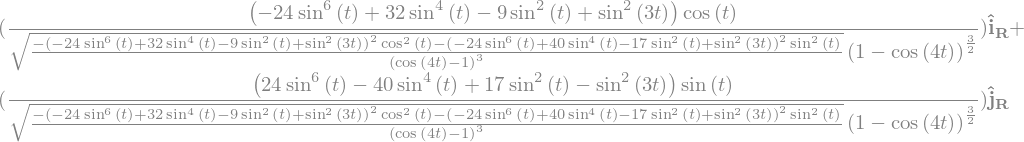

In [76]:
UN(astroid(t)).simplify()

In [77]:
def UB(curve): return (UT(curve)^UN(curve)).simplify()

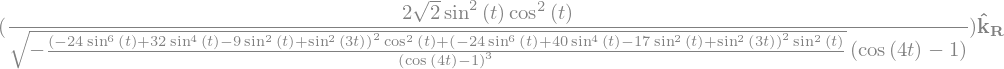

In [78]:
UB(astroid(t)).trigsimp()

E finalmente vamos calcular a curvatura e torção

In [79]:
def curvature(curve): return Norm(UT(curve).diff())/Norm(curve.diff())

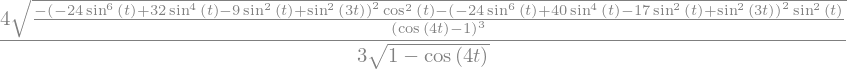

In [80]:
curvature(astroid(t)).simplify()

Só por curiosidade vamos ver quanto é a curvatura da astroide no ponto $t=\frac{\pi}{4}$

In [81]:
curvature(astroid(t)).subs(t,sp.pi/4)

Calcular a torção é um pouco mais complicado. Temos que resolver um sistema linear

In [82]:
tau = sp.symbols('tau')

In [83]:
def torsion(curve): return (curve.diff().cross(curve.diff(t,2))).dot(curve.diff(t,3))/Norm(curve.diff().cross(curve.diff(t,2)))

In [84]:
torsion(astroid(t))

Podemos definir outra função para calcular a torção utilizando a segunda formula

In [87]:
def torsion1(curve): return sp.solve(UB(curve.diff()).dot(R.i)+tau * Norm(curve.diff())*UN(curve).dot(R.i),tau)

In [88]:
torsion1(astroid(t))

A resposta Zero está entendivel pois a curva é planar e por isso não tem torsão, só tem curvatura.

#### Cicloide

a cicloide é uma curva plana definida via (um circoid de raio 2)

In [89]:
def cicloid(t, r=2): return r*(t-sp.sin(t))*R.i + r*(1-sp.cos(t))*R.j;
cicloid(t)

Agora vamos dar uma olhada no grafico dessa curva

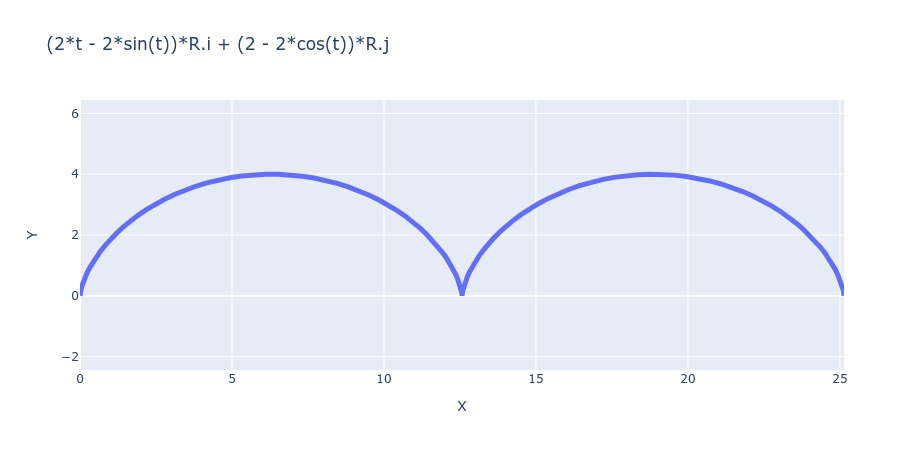

In [92]:
Plot_Parametric_Curve_plotly(cicloid(t),(0,4*np.pi))

<span style="color:red"> **EXERCICIO** Faça o mesmo analise que fizemos anteriormente para a cicloide </span>

#### Epiciclóide

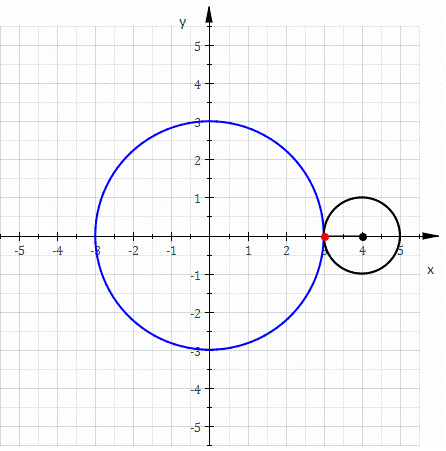

In [93]:
from IPython.display import display, Image
with open('Epicycloid.gif','rb') as file:
    display(Image(file.read()))

A curva vermelha é um epiciclóide traçado à medida que o pequeno círculo (raio $r = 1$) rola ao redor do exterior do círculo grande (raio $R = 3$).

Um epiciclóide pode ser implementado como (de raio marior R=3 e raio menor r=1)

In [94]:
def epicycloid(t, Rad=3, r=1): return ((Rad+r)*sp.cos(t)-r*sp.cos(t*(r+Rad)/r))*R.i + ((Rad+r)*sp.sin(t)-r*sp.sin(t*(r+Rad)/r))*R.j ;
epicycloid(t)

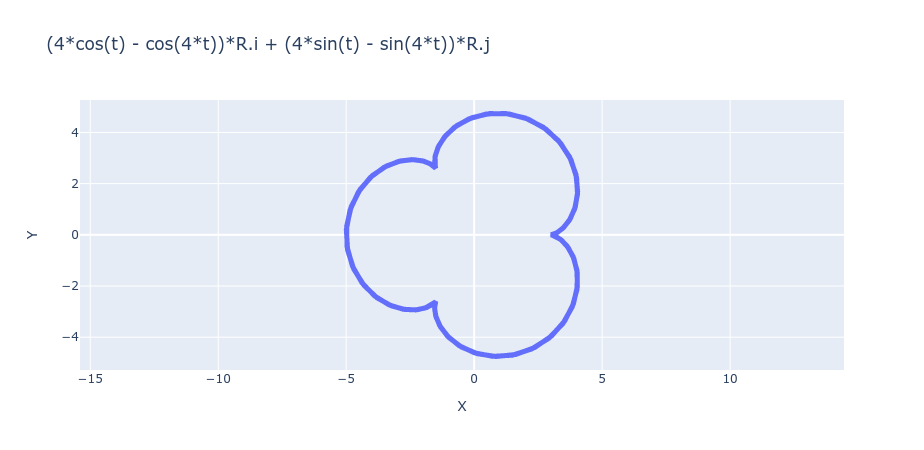

In [95]:
Plot_Parametric_Curve_plotly(epicycloid(t),(0,4*np.pi))

#### Epitrocóide

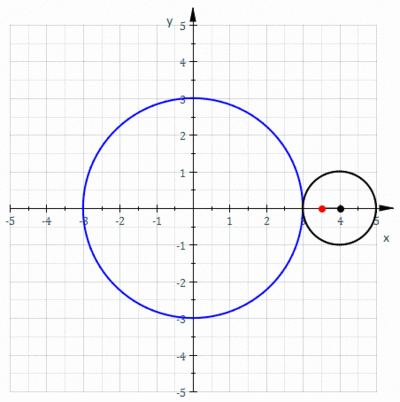

In [96]:
from IPython.display import display, Image
with open('Epitrochoid.gif','rb') as file:
    display(Image(file.read()))

The epitrochoid com R = 3, r = 1 e d = 1/2

In [97]:
def epitrochoid(t, Rad=3, r=1, d=0.5): return ((Rad+r)*sp.cos(t)-d*sp.cos(t*(r+Rad)/r))*R.i + ((Rad+r)*sp.sin(t)-d*sp.sin(t*(r+Rad)/r))*R.j ;
epitrochoid(t)

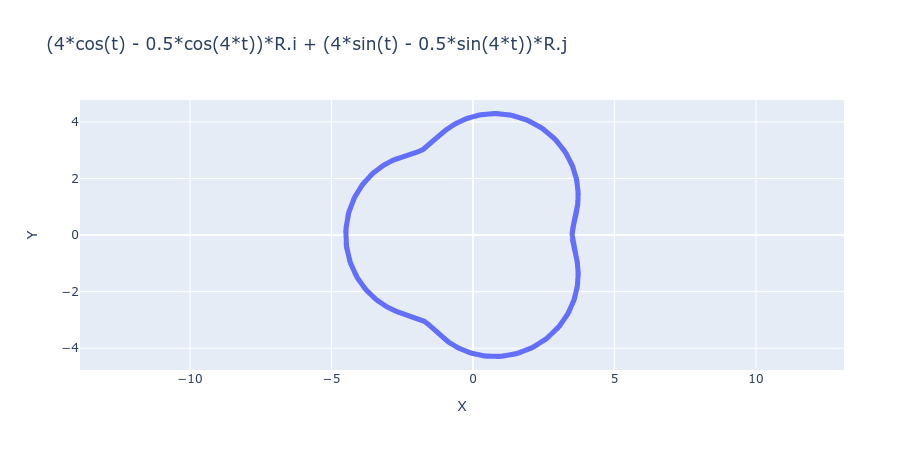

In [98]:
Plot_Parametric_Curve_plotly(epitrochoid(t),(0,4*np.pi))

<span style="color:red"> **EXERCICIO** Faça o mesmo analise que fizemos anteriormente para as curvas epitrocoide e epicicloide </span>

#### Cubica Retorcida

Essa curva é definida como

In [99]:
def cubic(t): return t*R.i + (t**2)*R.j + (t**3)*R.k;
cubic(t)

Agora vamos plotar essa curva utilizando Sympy

<IPython.core.display.Javascript object>


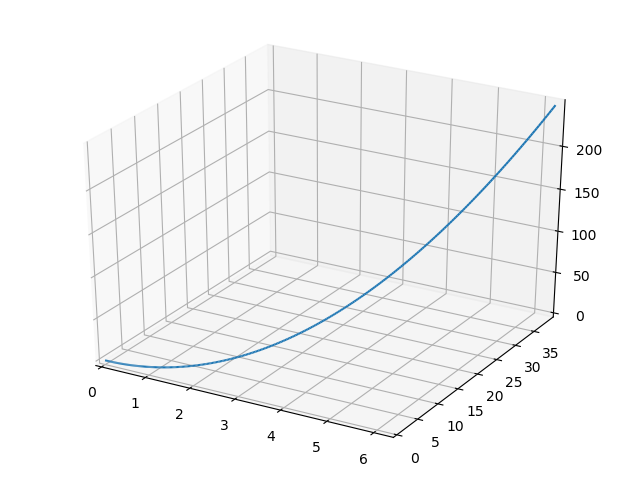

In [102]:
Plot3d_Parametric_Curve(cubic(t),(t,0,2*np.pi))

<span style="color:red"> **Exercicio**: Plote essa curva usando Plotly. </span>

Já que temos funções definidas para triedro de Frenet é facil achar-las para essa curva é 

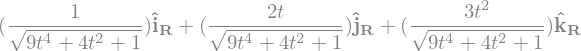

In [103]:
UT(cubic(t))

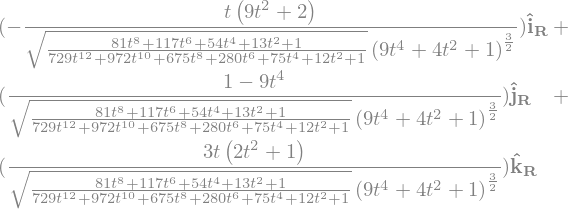

In [104]:
UN(cubic(t)).simplify()

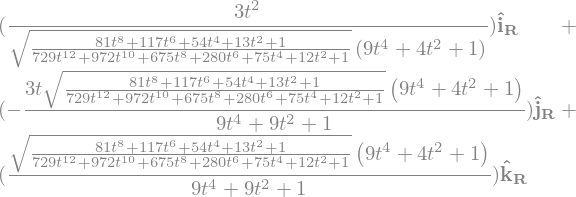

In [105]:
UB(cubic(t))

A curvatura e torsão dessa curva são 

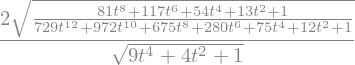

In [106]:
curvature(cubic(t))

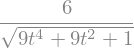

In [107]:
torsion(cubic(t))

<span style="color:red"> **EXERCICIO** encontra os vetores tangente, normal e binormal no ponto $t=\frac{\pi}{4}$. Calcule a curvatura e torsão nos pontos $t=\frac{\pi}{4}, \frac{\pi}{2}, \pi$ </span>